The objective of this notebook is to explore the training dataset, and potentially derive any new features if any for improving the prediction of the # of interactions on an instagram post. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('coolwarm')
%matplotlib inline

/Users/noahkasmanoff/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [10]:
instas = pd.read_csv('Business Analytics/training_set.csv',encoding = 'unicode_escape')

In [11]:
instas.head()

,Engagements,Followers at Posting,Created,Type,Description
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...


In [12]:
instas.describe()

,Engagements,Followers at Posting
count,7.766000e+03,7.766000e+03
mean,5.923129e+05,3.042770e+07
std,1.792682e+05,3.748957e+06
min,1.278160e+05,2.487554e+07
25%,4.173900e+05,2.698910e+07
50%,6.397285e+05,3.004747e+07
75%,7.216282e+05,3.392854e+07
max,1.129585e+06,3.698468e+07


In [13]:
instas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7766 entries, 0 to 7765
Data columns (total 5 columns):
Engagements             7766 non-null int64
Followers at Posting    7766 non-null int64
Created                 7766 non-null object
Type                    7766 non-null object
Description             7752 non-null object
dtypes: int64(2), object(3)
memory usage: 303.4+ KB


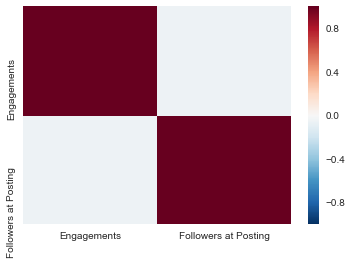

In [14]:
sns.heatmap(instas.corr())

First conclusion. We see that followers at posting is not an accurate signal as to how many people actually engage with it. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105fd8ac8>,
      dtype=object)

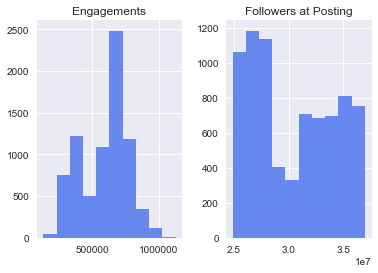

In [15]:
instas.hist()

We also observe there to be basically two distributions among both follwoers, as well as engagements. 

The followers one implies that only recenlty did the insta page gain new followers, and it was a relatively quick jump which is why the gap exists at 3e7 followers for not that many posts to have occured at that point. 


Another reason may be they did not post many instas at that time, etc. 


As for engagements, it seems to be two distributions, but the much more populated one exists where an insta has approximately 8 engagements per post. 


Using more features than this, we can hopefully infer what may best indicate the reason for an insta performing better than another. 

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


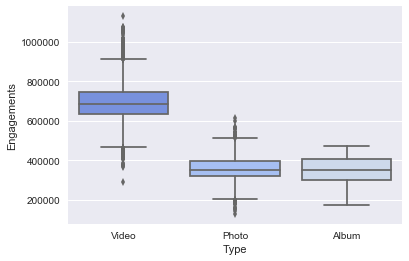

In [16]:
sns.categorical.boxplot(x="Type", y="Engagements", data=instas)


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


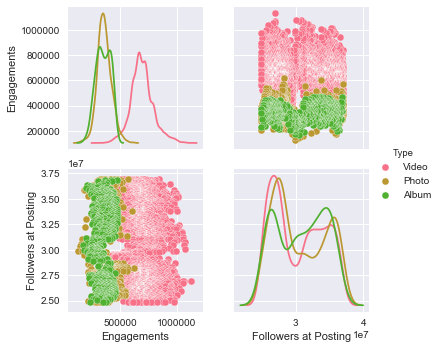

In [18]:
sns.set_palette('husl')
sns.pairplot(instas,hue = 'Type',diag_kind='kde')

Nice, another interesting conclusion. By splitting on post type, we see the video kind separates niceley from phto and album, and that videos receive more engagements than others. 

This naturally has no effect on followers at posting.  

Now to explore some additional variables...


In [24]:
instas.Description.values[0].split('@')

['The ',
 'raptors bench trio of ',
 'sergeibaka ',
 'normanpowell4 & ',
 'fredvanvleet combine for 48 in Game 4!']

In [25]:
instas.Description.values[0]

'The @raptors bench trio of @sergeibaka @normanpowell4 & @fredvanvleet combine for 48 in Game 4!'

In [30]:
instas.isna().sum()

Engagements              0
Followers at Posting     0
Created                  0
Type                     0
Description             14
dtype: int64

In [31]:
instas.fillna(' ',inplace=True)

In [32]:
instas['ntags'] = instas['Description'].apply(lambda z: len(z.split('@')) - 1)

In [36]:
instas['PostLen'] = instas['Description'].apply(len)

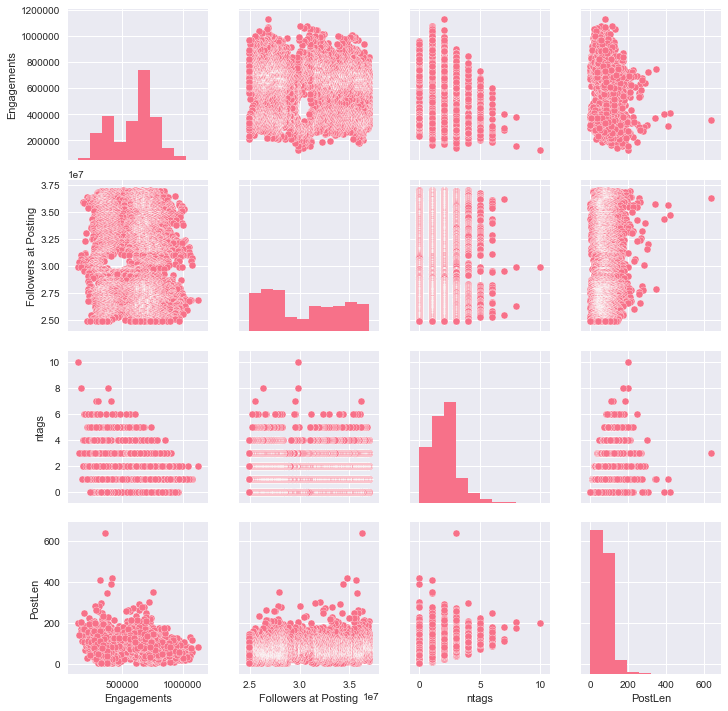

In [38]:
sns.pairplot(instas)

# Next theory to test



The NBA is a star driven league. I bet that of the most interacted posts, these typically have to do with nba stars and superstars, so next I'll try and encode a feature of the post based on "Contains Star" or something like that. 

In [53]:
#first, obtain a list of stars tagged. 
import re #use regular expression to obtain any time a name is used, find all

posts = " ".join(instas['Description'].unique())
tagged_profiles = list( dict.fromkeys(re.findall('@\w*',posts)) ) 


In [55]:
len(tagged_profiles)

848

my idea: for each of the tagged profiles, get the descirptive statistics regarding engagements, max, med, min, and see how powerful a prediction tool this is. 


In [57]:
instas.describe()

,Engagements,Followers at Posting,ntags,PostLen
count,7.766000e+03,7.766000e+03,7766.000000,7766.000000
mean,5.923129e+05,3.042770e+07,1.509014,69.055756
std,1.792682e+05,3.748957e+06,1.124158,37.140032
min,1.278160e+05,2.487554e+07,0.000000,1.000000
25%,4.173900e+05,2.698910e+07,1.000000,44.000000
50%,6.397285e+05,3.004747e+07,1.000000,63.000000
75%,7.216282e+05,3.392854e+07,2.000000,88.000000
max,1.129585e+06,3.698468e+07,10.000000,639.000000


In [95]:
d = []
for account in tagged_profiles:
    posts_w_account = instas.loc[instas['Description'].str.contains(account)]
    max_eng = posts_w_account.Engagements.max()
    tot_eng = posts_w_account.Engagements.sum()
    n_posts = posts_w_account.Engagements.count()
    min_eng = posts_w_account.Engagements.min()
    avg_eng = posts_w_account.Engagements.mean()
    d.append({'profile': account, 'max_eng': max_eng,'tot_eng' : tot_eng, 
             'n_posts' : n_posts, 'min_eng' : min_eng, 'avg_eng' : avg_eng})

profile_df = pd.DataFrame(d)

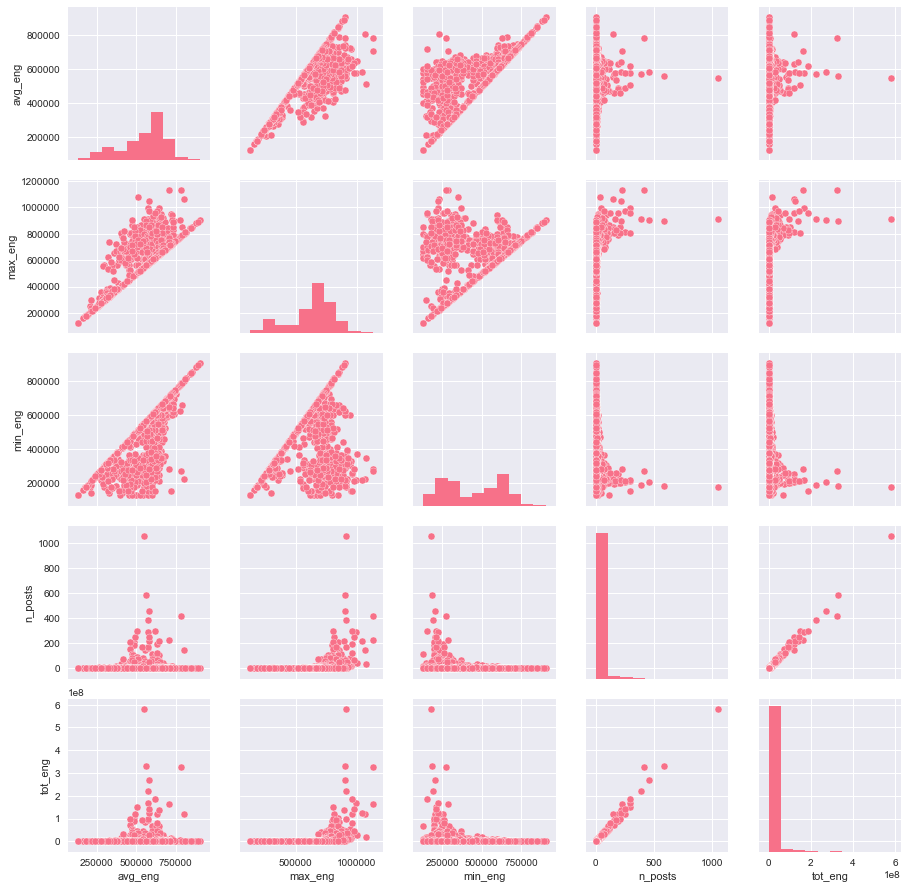

In [97]:
sns.pairplot(profile_df)

Here we loosely see that the more posts you are in, the more engagements you have. Also, the more posts you are in, the higher max engagement you have generally, as we as lower min engagement 

# While the player and user analysis is far from complete, another segment I'd want to consider is time of post, and see if that plays a role. 

Within this created time are a few things, actual calendar date, as well as specific time. Both could play a role, so consider each on its own. 

In [134]:
instas['Timezone'] = instas['Created'].str.split(' ',expand =True)[2]
instas['Date'] = instas['Created'].str.split(' ',expand = True)[0]
instas['Month'] = instas['Date'].str.split('-',expand = True)[1]

instas['Time'] = instas['Created'].str.split(' ',expand = True)[1]
instas['Hour'] = instas['Time'].str.split(':',expand=True)[0]

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


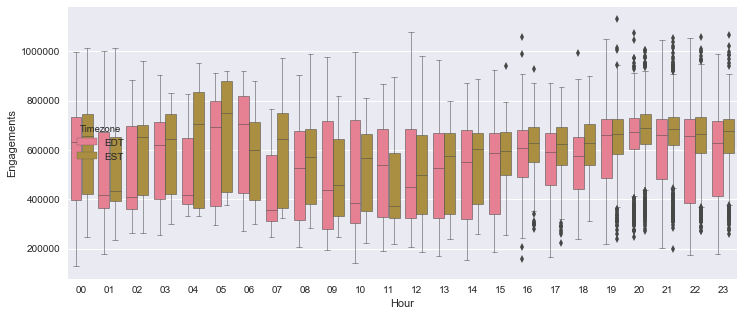

In [139]:
plt.figure(figsize=(12,5))
sns.categorical.boxplot(x="Hour", y="Engagements", data=instas,hue='Timezone',linewidth=.5)


/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


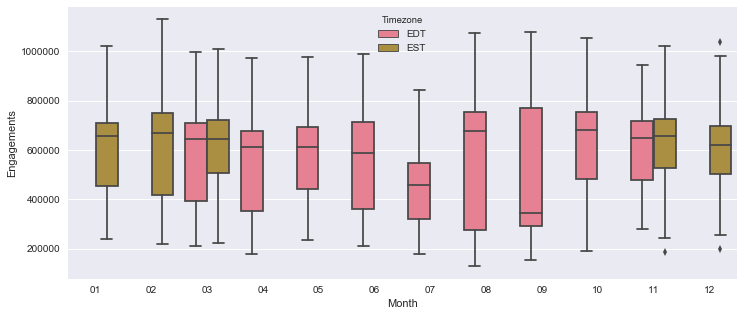

In [140]:
plt.figure(figsize=(12,5))
sns.categorical.boxplot(x="Month", y="Engagements", data=instas,hue='Timezone')


Easy way to visualize daylight savings, remember it changes in march and november, so good spot check here to confirm this works. 

Conclusion. Time does play a little bit of a role! Noting this is a categorical variable though, not continuious 

Is it possible to determine day of week?

In [129]:
instas.Timezone.unique()

array(['EDT', 'EST'], dtype=object)

0       EDT
1       EDT
2       EDT
3       EDT
4       EDT
5       EDT
6       EDT
7       EDT
8       EDT
9       EDT
10      EDT
11      EDT
12      EDT
13      EDT
14      EDT
15      EDT
16      EDT
17      EDT
18      EDT
19      EDT
20      EDT
21      EDT
22      EDT
23      EDT
24      EDT
25      EDT
26      EDT
27      EDT
28      EDT
29      EDT
       ... 
7736    EDT
7737    EDT
7738    EDT
7739    EDT
7740    EDT
7741    EDT
7742    EDT
7743    EDT
7744    EDT
7745    EDT
7746    EDT
7747    EDT
7748    EDT
7749    EDT
7750    EDT
7751    EDT
7752    EDT
7753    EDT
7754    EDT
7755    EDT
7756    EDT
7757    EDT
7758    EDT
7759    EDT
7760    EDT
7761    EDT
7762    EDT
7763    EDT
7764    EDT
7765    EDT
Name: Timezone, Length: 7766, dtype: object

# Next idea. Start off easy, turn this into a classification problem of high vs low engagmeent posts

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


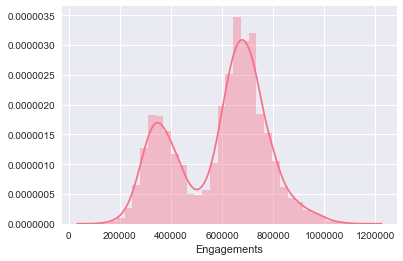

In [141]:
sns.distplot(instas['Engagements'])

In [142]:
from sklearn.cluster import KMeans


In [143]:
kmeans = KMeans(n_clusters=2)

In [146]:
kmeans.fit(instas['Engagements'].values.reshape(-1,1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [147]:
kmeans.labels_

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [149]:
instas['cluster'] = kmeans.labels_

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


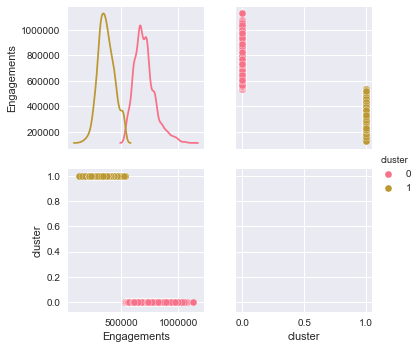

In [152]:
sns.pairplot(instas[['Engagements','cluster']],hue='cluster',diag_kind='kde')

So now its a low vs high dataset. 

Using this version, it may be easier to restart the engagement hunt, and only classify based on this. Note however the significant class imbalance. 

In [153]:
instas

,Engagements,Followers at Posting,Created,Type,Description,ntags,PostLen,Date,Time,Hour,Month,Timezone,cluster
0,502093,36984682,2019-05-21 23:30:51 EDT,Video,The @raptors bench trio of @sergeibaka @norman...,4,95,2019-05-21,23:30:51,23,05,EDT,1
1,603380,36984682,2019-05-21 22:53:33 EDT,Video,@kyle_lowry7 pulls from deep for the @raptors ...,2,64,2019-05-21,22:53:33,22,05,EDT,0
2,603380,36984682,2019-05-21 22:19:58 EDT,Video,@k_mid22 with some english on the @bucks dime!,2,46,2019-05-21,22:19:58,22,05,EDT,0
3,725100,36984682,2019-05-21 22:02:41 EDT,Video,Kawhi punches it home with the left on TNT!,0,43,2019-05-21,22:02:41,22,05,EDT,0
4,661446,36984682,2019-05-21 20:47:49 EDT,Video,@giannis_an34 goes baseline early to rock the ...,1,57,2019-05-21,20:47:49,20,05,EDT,0
5,322444,36955156,2019-05-21 14:02:32 EDT,Photo,Congrats to the 2018-19 NBA All-Rookie First T...,2,104,2019-05-21,14:02:32,14,05,EDT,1
6,722540,36955156,2019-05-21 12:30:53 EDT,Video,The @warriors locked in for four games to adva...,1,106,2019-05-21,12:30:53,12,05,EDT,0
7,339265,36955156,2019-05-21 08:59:02 EDT,Photo,Will the @bucks take a commanding 3-1 lead... ...,2,88,2019-05-21,08:59:02,08,05,EDT,1
8,443330,36955156,2019-05-21 00:48:16 EDT,Photo,TAP to SHOP the @warriors Western Conference C...,2,75,2019-05-21,00:48:16,00,05,EDT,1
9,652193,36955156,2019-05-21 00:38:18 EDT,Video,Hey @stephencurry30... that was the first time...,2,121,2019-05-21,00:38:18,00,05,EDT,0
